In [1]:
import pandas as pd

In [2]:
green_2017_06 = pd.read_csv("data/green_tripdata_2017-06.csv")
yellow_2017_06 = pd.read_csv("data/yellow_tripdata_2017-06.csv")
fhv_2017_06 = pd.read_csv("data/fhv_tripdata_2017-06.csv")


In [3]:
green_2017_06 ["lpep_pickup_datetime"] = pd.to_datetime (green_2017_06.lpep_pickup_datetime)
yellow_2017_06 ["tpep_pickup_datetime"] = pd.to_datetime (yellow_2017_06.tpep_pickup_datetime)
fhv_2017_06 ["Pickup_DateTime"] = pd.to_datetime (fhv_2017_06.Pickup_DateTime)


In [4]:
green_2017_06_1st_june = green_2017_06.loc [green_2017_06.lpep_pickup_datetime.dt.day ==1]
yellow_2017_06_1st_june = yellow_2017_06.loc [yellow_2017_06.tpep_pickup_datetime.dt.day ==1] 
fhv_2017_06_1st_june = fhv_2017_06.loc [fhv_2017_06.Pickup_DateTime.dt.day ==1]



In [5]:
lookup = pd.read_csv("data/taxi+_zone_lookup.csv")

In [6]:
# make a list of taxi zone id for Brooklyn
Brooklyn_id = lookup.loc[lookup.Borough == 'Brooklyn']['LocationID'].tolist()

# select Brooklyn TAXI pickups 
BK_pick_green_taxi = pd.DataFrame()
for x in Brooklyn_id:  
    BK_pick_green_taxi=BK_pick_green_taxi.append (green_2017_06_1st_june.loc[green_2017_06_1st_june.PULocationID==x])


In [7]:
# select Brooklyn FVH pickups
BK_pick_FHV = pd.DataFrame()
for x in Brooklyn_id:  
    BK_pick_FHV = BK_pick_FHV.append (fhv_2017_06_1st_june.loc[fhv_2017_06_1st_june.PUlocationID==x])



In [9]:
# Calculate total number of pickup in each taxi zones in Brooklyn
taxi_pick_per_zone = BK_pick_green_taxi.groupby([BK_pick_green_taxi.PULocationID]).count()
taxi_pick_per_zone = taxi_pick_per_zone.rename(index=str, columns={"VendorID": "total_pickups_taxi"})
taxi_pick_per_zone= taxi_pick_per_zone.reset_index()
taxi_pick_per_zone = taxi_pick_per_zone.drop(['lpep_pickup_datetime', 'lpep_dropoff_datetime','lpep_dropoff_datetime','DOLocationID', 'store_and_fwd_flag', 'RatecodeID','passenger_count','trip_distance','fare_amount','extra', 'mta_tax','tip_amount','ehail_fee','improvement_surcharge', 'total_amount' ,'payment_type','trip_type', 'tolls_amount'], axis=1)



In [10]:
# Calculate total number of Drops Offs in NYC  zones that are originated from Brooklyn 
taxi_drop_per_zone = BK_pick_green_taxi.groupby([BK_pick_green_taxi.DOLocationID]).count()
taxi_drop_per_zone= taxi_drop_per_zone.rename(index=str, columns={"VendorID": "total_dropoffs_taxi"})
taxi_drop_per_zone=taxi_drop_per_zone.reset_index()
taxi_drop_per_zone = taxi_drop_per_zone.drop(['lpep_pickup_datetime', 'lpep_dropoff_datetime','lpep_dropoff_datetime','PULocationID', 'store_and_fwd_flag', 
                                              'RatecodeID','passenger_count','trip_distance','fare_amount','extra', 'mta_tax','tip_amount','ehail_fee','improvement_surcharge',
                                              'total_amount' ,'payment_type','trip_type', 'tolls_amount'], axis=1)



In [11]:
taxi_pick_per_zone.head()

,PULocationID,total_pickups_taxi
0,14,31
1,17,321
2,21,2
3,22,4
4,25,793


In [12]:
taxi_drop_per_zone.head()

,DOLocationID,total_dropoffs_taxi
0,1,6
1,4,30
2,7,22
3,9,1
4,10,3


In [14]:
#calculate total number of  FHV pickups in each taxi zones in Brooklyn
FHV_pick_per_zone = BK_pick_FHV.groupby([BK_pick_FHV.PUlocationID]).count()
FHV_pick_per_zone = FHV_pick_per_zone.rename(index=str, columns={"Pickup_DateTime": "total_pickups_fhv"})
FHV_pick_per_zone=FHV_pick_per_zone.reset_index()
FHV_pick_per_zone = FHV_pick_per_zone.drop([ 'DropOff_datetime','DOlocationID'], axis=1)



In [15]:
# Calculate total number of drop offs in each NYC where trips are originated from Brooklyn
FHV_drop_per_zone = BK_pick_FHV.groupby([BK_pick_FHV.DOlocationID]).count()
FHV_drop_per_zone = FHV_drop_per_zone.rename(index=str, columns={'Pickup_DateTime': "total_dropoffs_fhv"})
FHV_drop_per_zone=FHV_drop_per_zone.reset_index()
FHV_drop_per_zone = FHV_drop_per_zone.drop([ 'DropOff_datetime','PUlocationID'], axis=1)


In [16]:
FHV_pick_per_zone.head()

,PUlocationID,Dispatching_base_num,total_pickups_fhv
0,11.0,320,320
1,14.0,1766,1766
2,17.0,2908,2908
3,21.0,723,723
4,22.0,876,876


In [17]:
FHV_drop_per_zone.head()

,DOlocationID,Dispatching_base_num,total_dropoffs_fhv
0,1.0,240,240
1,3.0,5,5
2,4.0,182,182
3,5.0,4,4
4,6.0,11,11


In [18]:
# calculate per hour TAXI pickup in Brooklyn on june 1st 2017
taxi_hourly = green_2017_06_1st_june.groupby([green_2017_06_1st_june.lpep_pickup_datetime.dt.hour], as_index=False).count()
taxi_hourly=taxi_hourly.reset_index()
taxi_hourly = taxi_hourly.drop(['lpep_pickup_datetime','lpep_dropoff_datetime','PULocationID','DOLocationID'], axis=1)
taxi_hourly = taxi_hourly.rename(index=str, columns={"VendorID": "total_pickups_taxi"})
taxi_hourly = taxi_hourly.rename(index=str, columns={"index": "hour1"})



In [19]:
# calculate per hour FHV pickup in Brooklyn on june 1st 2017

fhv_hourly = fhv_2017_06_1st_june.groupby([fhv_2017_06_1st_june.Pickup_DateTime.dt.hour], as_index=False).count()
fhv_hourly=fhv_hourly.reset_index()
fhv_hourly = fhv_hourly.drop(['DropOff_datetime','PUlocationID','DOlocationID'], axis=1)
fhv_hourly = fhv_hourly.rename(index=str, columns={"Pickup_DateTime": "total_pickups_FHV"})
fhv_hourly = fhv_hourly.rename(index=str, columns={"index": "hour"})


In [20]:
joined_taxi_fhv = pd.concat([taxi_hourly, fhv_hourly], axis=1, join='inner')

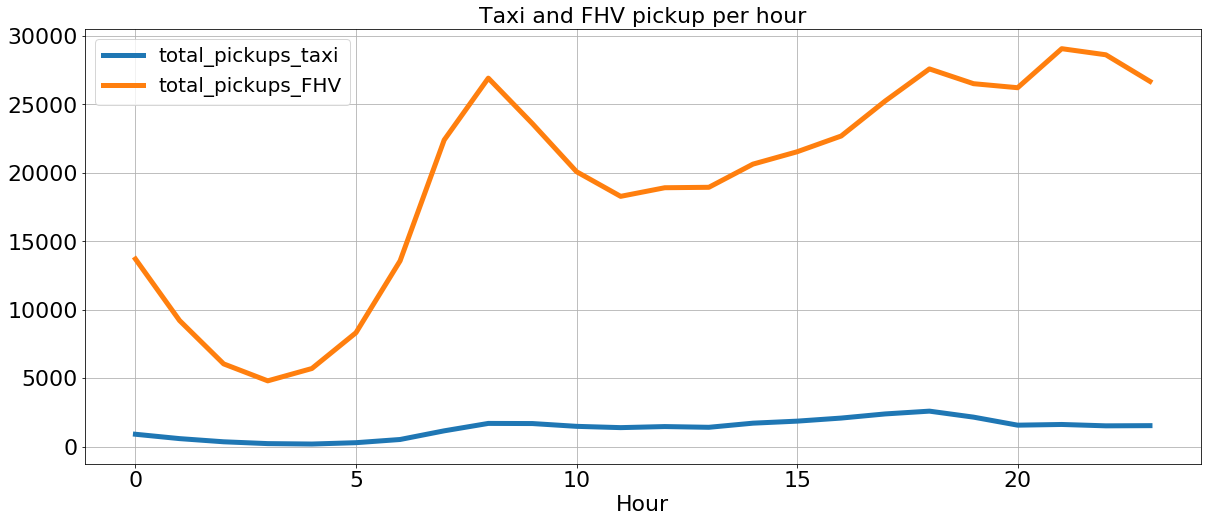

In [25]:


import matplotlib.pyplot as plt
#plt.figure();
joined_taxi_fhv.plot(x='hour', y=['total_pickups_taxi', 'total_pickups_FHV'], linewidth=5, fontsize= 22,
                     figsize=(20,8), grid=True, title=('Brooklyn Hourly Pick ups'), x_compat=True)
plt.xlabel('Hour', fontsize=22)
plt.title('Taxi and FHV pickup per hour',  fontsize=22)
plt.legend(loc=2, prop={'size': 20})

